Import libs


In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

numberOfSteps = 120
numberOfNeurons = 100
dropoutRate = 0.2
denseUnits = 1
opt = "adam"
lossFunction = "mean_squared_error"

Import train data

In [35]:
dataset_train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/rnn/Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

Feature scailing

In [36]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

Create 60 timesteps and 1 output

In [37]:
X_train = []
y_train = []
for i in range(numberOfSteps, len(training_set_scaled)):
  X_train.append(training_set_scaled[i-numberOfSteps:i, 0])
  y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

Reshaping

In [38]:
X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1], 1))

Building RNN - Stacked LSTM /
Initialize RNN

In [39]:
# Initialize RNN and first LSTM layer
regressor = Sequential()
regressor.add(LSTM(units=numberOfNeurons, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(dropoutRate))

# Add second LSTM with Dropout regularization
regressor.add(LSTM(units=numberOfNeurons, return_sequences=True))
regressor.add(Dropout(dropoutRate))

# Add third LSTM with Dropout regularization
regressor.add(LSTM(units=numberOfNeurons, return_sequences=True))
regressor.add(Dropout(dropoutRate))

# Add forth LSTM with Dropout regularization
regressor.add(LSTM(units=numberOfNeurons, return_sequences=True))
regressor.add(Dropout(dropoutRate))

# Add fifth LSTM with Dropout regularization
regressor.add(LSTM(units=numberOfNeurons, return_sequences=False))
regressor.add(Dropout(dropoutRate))

# Add output layer
regressor.add(Dense(units=denseUnits))

# Compiling the RNN
regressor.compile(optimizer=opt, loss=lossFunction)

Fitting the RNN regressor to the training set


In [40]:
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
1138/1138 [==============================] - 24s 22ms/step - loss: 0.0298
Epoch 2/100
1138/1138 [==============================] - 22s 19ms/step - loss: 0.0052
Epoch 3/100
1138/1138 [==============================] - 22s 19ms/step - loss: 0.0048
Epoch 4/100
1138/1138 [==============================] - 22s 19ms/step - loss: 0.0045
Epoch 5/100
1138/1138 [==============================] - 22s 19ms/step - loss: 0.0041
Epoch 6/100
1138/1138 [==============================] - 22s 19ms/step - loss: 0.0044
Epoch 7/100
1138/1138 [==============================] - 22s 19ms/step - loss: 0.0040
Epoch 8/100
1138/1138 [==============================] - 22s 19ms/step - loss: 0.0036
Epoch 9/100
1138/1138 [==============================] - 22s 19ms/step - loss: 0.0040
Epoch 10/100
1138/1138 [==============================] - 22s 19ms/step - loss: 0.0042
Epoch 11/100
1138/1138 [==============================] - 22s 19ms/step - loss: 0.0040
Epoch 12/100
1138/1138 [============================

Making predictions and visualizing

In [51]:
# Import test set
dataset_test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/rnn/Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values
# Predict the stock price of 2017
# Concatenate training + test set
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - numberOfSteps:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

X_test = []
for i in range(numberOfSteps, len(inputs)):
  X_test.append(inputs[i-numberOfSteps:i, 0])
X_test = np.array(X_test)

X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


Plot the Results

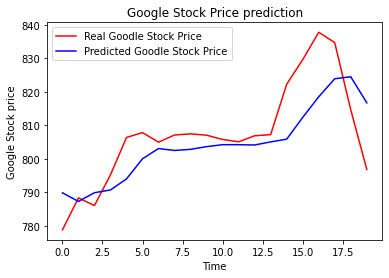

In [52]:
# Using plt to plot the chart
plt.plot(real_stock_price, color= "red", label="Real Goodle Stock Price")
plt.plot(predicted_stock_price, color= "blue", label="Predicted Goodle Stock Price")
plt.title("Google Stock Price prediction")
plt.xlabel("Time")
plt.ylabel("Google Stock price")
plt.legend()
plt.show()
